In [1]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [2]:
import numpy as np
import pandas as pd

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [12]:
# code here
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
data['labels'] = labels
birds = pd.DataFrame(data)
birds.set_index('labels',inplace = True)
birds.head()

,birds,age,visits,priority
labels,,,,
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no


In [14]:
birds.shape

(11, 4)

In [16]:
# iii)
birds.iloc[::2]

,birds,age,visits,priority
labels,,,,
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [21]:
# code here
# i)
birds[['birds','age']].iloc[[0,2,6]]

,birds,age
labels,,
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [26]:
# ques2 - ii)
birds[birds['visits']<4]

,birds,age,visits,priority
labels,,,,
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [31]:
# code here
# 3-i)
birds[birds['age'].isnull() | birds['visits'].isnull()]

,birds,age,visits,priority
labels,,,,
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [48]:
# 3-ii)
birds.mode().iloc[0]
birds.fillna(birds.mode().iloc[0])


,birds,age,visits,priority
labels,,,,
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,3.5,2,yes
i,spoonbills,8.0,3,no


###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [69]:
# code here
# birds['visits'].index
birds[birds['birds']== 'Cranes']['visits'].sum()

14

##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [76]:
# code here
ipl_data = pd.read_csv('./datasets/dataset_session_17/ipl-matches.csv')
ipl_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [89]:
 ipl_data[['Team1','Team2','WinningTeam','TossWinner']]=ipl_data[['Team1','Team2','WinningTeam','TossWinner']].replace(['Delhi Daredevils','Kings XI Punjab','Rising Pune Supergiants'],['Delhi Capitals','Punjab Kings','Rising Pune Supergiant'])

###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


In [101]:
# code here
temp = ipl_data.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

<AxesSubplot:>

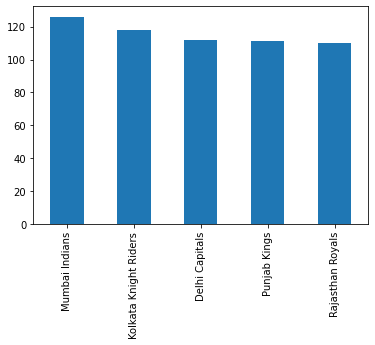

In [114]:
ipl_data['Team1'].value_counts().head(5).plot(kind = 'bar')
ipl_data['Team2'].value_counts().head(5).plot(kind = 'bar')
# print(temp1)
# temp2
        

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [115]:
# code here
ipl_data.sample()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
325,1082639,Chandigarh,2017-05-09,2017,49,Punjab Kings,Kolkata Knight Riders,"Punjab Cricket Association IS Bindra Stadium, ...",Kolkata Knight Riders,field,N,Punjab Kings,Runs,14.0,NaN,MM Sharma,"['MJ Guptill', 'M Vohra', 'SE Marsh', 'WP Saha...","['SP Narine', 'CA Lynn', 'G Gambhir', 'RV Utha...",A Nand Kishore,S Ravi


In [135]:
player = ipl_data[(ipl_data['Team1'] == 'Mumbai Indians') | (ipl_data['Team2'] == 'Mumbai Indians')]['Player_of_Match'].value_counts().head(1)
player

RG Sharma    16
Name: Player_of_Match, dtype: int64

###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [147]:
# code here
def team1_vs_team2(team1,team2):
    pass
ipl_data[ipl_data['WinningTeam'] == 'Kolkata Knight Riders'].shape[0]
ipl_data[ipl_data['WinningTeam'] == 'Chennai Super Kings'].shape[0]
ipl_data[(ipl_data['WinningTeam'] == 'Kolkata Knight Riders') | (ipl_data['WinningTeam'] == 'Chennai Super Kings')]['Player_of_Match'].value_counts().head(1)

MS Dhoni      15
AD Russell    12
SK Raina      12
RA Jadeja     11
SP Narine     11
              ..
VR Iyer        1
MS Bisla       1
KD Karthik     1
B Lee          1
DJ Hussey      1
Name: Player_of_Match, Length: 81, dtype: int64

In [152]:
def teams1_vs_team2(team1,team2):
    win_team1_record = ipl_data[ipl_data['WinningTeam'] == team1].shape[0]
    loss_team1 = ipl_data.shape[0] - win_team1_record
    win_team2_record = ipl_data[ipl_data['WinningTeam'] == team2].shape[0]
    loss_team2 = ipl_data.shape[0] - win_team2_record
    player = ipl_data[(ipl_data['WinningTeam'] == 'Kolkata Knight Riders') | (ipl_data['WinningTeam'] == 'Chennai Super Kings')]['Player_of_Match'].value_counts().head(1)
    return win_team1_record, win_team2_record,player
win1,win2, player = teams1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
"win1 record{} win2 record {}  player {}".format(win1,win2,player)

'win1 record114 win2 record 121  player MS Dhoni    15\nName: Player_of_Match, dtype: int64'

### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



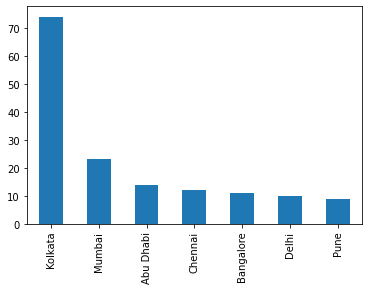

In [161]:
# code here
result = ipl_data[(ipl_data['Team1'] == 'Kolkata Knight Riders') | (ipl_data['Team2'] == 'Kolkata Knight Riders')]['City'].value_counts().head(7).plot(kind = 'bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [158]:
# code here
ipl_data[(ipl_data['Team1'] == 'Mumbai Indians') | (ipl_data['Season'] == 2011)]['Margin'].mean()

17.972727272727273